# pass@k analysis
This notebook demonstrates how to visualize which model managed to achieve which pass@k value.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename)
        df = pd.read_csv(directory + filename)
        df['model'] = filename.replace("_passk_results.csv", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_claude-3-opus-20240229_passk_results.csv
samples_codellama_passk_results.csv
samples_gemini-pro_passk_results.csv
samples_gpt-3.5-turbo-1106_passk_results.csv
samples_gpt-4-1106-preview_passk_results.csv
samples_gpt-4-turbo-2024-04-09_passk_results.csv
samples_Mistral-7B-Instruct-v0.2_passk_results.csv
samples_reference_passk_results.csv


In [3]:
df

,Unnamed: 0,pass@1,pass@5,pass@10,model
0,0,0.436170,0.642604,0.702128,claude-3-opus-20240229
0,0,0.078723,0.247720,0.382979,codellama
0,0,0.142553,0.340679,0.446809,gemini-pro
0,0,0.304255,0.540780,0.638298,gpt-3.5-turbo-1106
0,0,0.485106,0.726106,0.787234,gpt-4-1106-preview
0,0,0.431915,0.687943,0.723404,gpt-4-turbo-2024-04-09
0,0,0.138298,0.297872,0.382979,Mistral-7B-Instruct-v0.2
0,0,1.000000,1.000000,1.000000,reference


In [4]:
# Drop the "Unnamed: 0" column from the dataframe
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_values("pass@1", ascending=False)
df

,pass@1,pass@5,pass@10,model
0,1.000000,1.000000,1.000000,reference
0,0.485106,0.726106,0.787234,gpt-4-1106-preview
0,0.436170,0.642604,0.702128,claude-3-opus-20240229
0,0.431915,0.687943,0.723404,gpt-4-turbo-2024-04-09
0,0.304255,0.540780,0.638298,gpt-3.5-turbo-1106
0,0.142553,0.340679,0.446809,gemini-pro
0,0.138298,0.297872,0.382979,Mistral-7B-Instruct-v0.2
0,0.078723,0.247720,0.382979,codellama


In [5]:
# Set the "model" column as the index and then transpose
df_transposed = df.set_index('model').transpose()
df_transposed['k'] = [1,5,10]
df_transposed

model,reference,gpt-4-1106-preview,claude-3-opus-20240229,gpt-4-turbo-2024-04-09,gpt-3.5-turbo-1106,gemini-pro,Mistral-7B-Instruct-v0.2,codellama,k
pass@1,1.0,0.485106,0.436170,0.431915,0.304255,0.142553,0.138298,0.078723,1
pass@5,1.0,0.726106,0.642604,0.687943,0.540780,0.340679,0.297872,0.247720,5
pass@10,1.0,0.787234,0.702128,0.723404,0.638298,0.446809,0.382979,0.382979,10


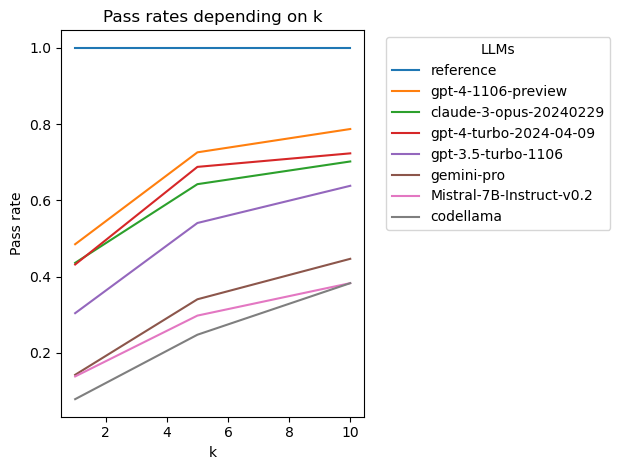

In [6]:
import matplotlib.pyplot as plt

# Assuming 'k' is an index after transposition, let's reset the index first if not already done
if 'k' not in df_transposed.columns:
    df_transposed.reset_index(inplace=True)

# Separate 'k' column for x-axis
x = df_transposed['k']

# Plot each column except 'k' against 'k'
for column in df_transposed.columns:
    if column != 'k':  # Avoid plotting 'k' against itself
        plt.plot(x, df_transposed[column], label=column)

# Adding plot decorations
plt.xlabel('k')
plt.ylabel('Pass rate')
plt.title('Pass rates depending on k')
plt.legend(title='LLMs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("../docs/paper/pass_k_llms_plot.png")
plt.show()